# Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
import glob
import pathlib
import darts
from darts import TimeSeries
import matplotlib.pyplot as plt
from tqdm import tqdm
from darts.dataprocessing.transformers.scaler import Scaler

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import r2_score




# Helping Functions 


In [ ]:
def plot_scatter(df):
    os.makedirs('../plots/Iteration_03',exist_ok=True)
    saturday_Df = df[df['day_of_week']==5]
    sunday_Df = df[df['day_of_week']==6]
    friday_Df = df[df['day_of_week']==4]
    thursday_Df = df[df['day_of_week']==3]
    wednesday_Df = df[df['day_of_week']==2]
    Tuesday_Df = df[df['day_of_week']==1]
    monday_Df = df[df['day_of_week']==0]
    
    jan_Df = df[df['month']==1]
    feb_Df = df[df['month']==2]
    march_Df = df[df['month']==3]
    april_Df = df[df['month']==4]
    may_Df = df[df['month']==5]
    june_Df = df[df['month']==6]
    july_Df = df[df['month']==7]
    aug_Df = df[df['month']==8]
    sept_Df = df[df['month']==9]
    oct_Df = df[df['month']==10]
    Nov_Df = df[df['month']==11]
    decem_Df = df[df['month']==12]
    
    
    fig = make_subplots()
                        
    
    fig.add_trace(go.Scatter(x=df['date'], y=df['order_id'], mode='markers+lines',name='Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=saturday_Df['date'], y=saturday_Df['order_id'], mode='markers',name='-Saturday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=sunday_Df['date'], y=sunday_Df['order_id'], mode='markers',name='-Sunday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=friday_Df['date'], y=friday_Df['order_id'], mode='markers',name='-friday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=thursday_Df['date'], y=thursday_Df['order_id'], mode='markers',name='-Thursday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=wednesday_Df['date'], y=wednesday_Df['order_id'], mode='markers',name='-Wednesday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=Tuesday_Df['date'], y=Tuesday_Df['order_id'], mode='markers',name='-Tuesday-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=monday_Df['date'], y=monday_Df['order_id'], mode='markers',name='-Monday-Quantity'),row=1,col=1)
    
    fig.add_trace(go.Scatter(x=jan_Df['date'], y=jan_Df['order_id'], mode='markers+lines',name='-Jan-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=feb_Df['date'], y=feb_Df['order_id'], mode='markers+lines',name='-Feb-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=march_Df['date'], y=march_Df['order_id'], mode='markers+lines',name='-March-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=april_Df['date'], y=april_Df['order_id'], mode='markers+lines',name='-April-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=may_Df['date'], y=may_Df['order_id'], mode='markers+lines',name='-May-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=june_Df['date'], y=june_Df['order_id'], mode='markers+lines',name='-June-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=july_Df['date'], y=july_Df['order_id'], mode='markers+lines',name='-july-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=aug_Df['date'], y=aug_Df['order_id'], mode='markers+lines',name='-Aug-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=sept_Df['date'], y=sept_Df['order_id'], mode='markers+lines',name='-Sept-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=Nov_Df['date'], y=Nov_Df['order_id'], mode='markers+lines',name='-Nov-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=oct_Df['date'], y=oct_Df['order_id'], mode='markers+lines',name='-Oct-Quantity'),row=1,col=1)
    fig.add_trace(go.Scatter(x=decem_Df['date'], y=decem_Df['order_id'], mode='markers+lines',name='-Decem-Quantity'),row=1,col=1)
    


    fig.update_layout(
        title='Scatter Plot of Order ID',
        height=600,
        width=1800,
        font_size=14
    )
    fig.update_yaxes(title_text='Quantity', row=1, col=1)
    fig.update_yaxes(title_text='Revenue', row=2, col=1)
    fig.show()
    fig.write_html(f'../plots/Iteration_03/all_data.html')

def calculate_smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE) given actual and predicted values.

    Parameters:
    actual (list or array): The actual (true) values.
    predicted (list or array): The predicted values.

    Returns:
    smape (float): The SMAPE value.
    """
    n = len(actual)
    sum_smape = sum(2 * abs(a - p) / (abs(a) + abs(p)) for a, p in zip(actual, predicted))
    smape = (1 / n) * sum_smape * 100
    return smape

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error 

def calculate_metrics(actual, predicted):
    # Convert inputs to numpy arrays for easier calculations
    smape = calculate_smape(actual, predicted)
    r2 = r2_score(actual, predicted)

    medae = median_absolute_error(actual, predicted)

    # Mean Squared Logarithmic Error (MSLE)
    msle = mean_squared_log_error(actual, predicted)
    
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate individual metrics
    mae = np.mean(np.abs(predicted - actual))
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))
    mape = np.mean(np.abs((predicted - actual) / actual)) * 100
    mse = np.mean((predicted - actual) ** 2)
    
    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'MSE': mse,
        'SMAPE':smape,
        'R2':r2,
        'MEDEA':medae,
        'MSLE':msle,
        
    }
    
    return metrics


# Loading data

In [ ]:
os.makedirs('../processedData/Iteration_03', exist_ok=True)

fileName = '../RawData/Sales Forecast_NEW2.xlsx'
df = pd.read_excel(fileName,sheet_name='NEW_DATA')
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
df.to_csv('../processedData/Iteration_03/sorted_Sales_Forecast_dataset.csv',index=False)
df =  df[['date','order_id']]
df.to_csv('../processedData/Iteration_03/date_order_sales_forecast_dataset.csv',index=False)


In [ ]:
df.head()

In [ ]:
df = df.groupby('date')['order_id'].sum().reset_index()
df.to_csv('../processedData/Iteration_03/date_order_id_sales_forecast_cleaned.csv',index=False)

In [ ]:
df['year'] = df['date'].dt.year
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_of_week
df['day_name'] = df['date'].dt.strftime('%A')


In [ ]:
df.head()

In [ ]:
df = df.iloc[:-30]

In [ ]:
plot_scatter(df)

## Spliting Data into Training & Testing Data

In [ ]:
from darts import TimeSeries
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing daily data
series = TimeSeries.from_dataframe(df, "date", "order_id", freq='1D', fill_missing_dates=True, fillna_value=0)


split_point = pd.Timestamp('2023-04-30')

train_series, test_series = series.split_after(split_point)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train_series)
test_transformed = transformer.transform(test_series)
series_transformed = transformer.transform(series)


# Set the figure size and style
plt.figure(figsize=(18, 6))
# Plot the training and testing data
train_transformed.plot(label='Training Data', color='blue', linewidth=1.5, marker='o')
test_transformed.plot(label='Testing Data', color='orange', linewidth=1.5, marker='o')

# Add title and labels
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('Order Number')

# Add grid lines
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()


# RNN_LSTM(Deep learning model)

In [ ]:
from darts.models.forecasting.rnn_model import  RNNModel

rnn_model =  RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=300,
    optimizer_kwargs={"lr": 1e-3},
    model_name="StoreNBR",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    save_checkpoints=True,
)
rnn_model.fit(train_transformed)

In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Function to predict and evaluate
def predict_and_evaluate(window_size, prediction_horizon, slide_step, test_series, model,result_plot_path,transformer ):
    num_predictions = len(test_series) - window_size - prediction_horizon + 1
    
    meta_information_evaluation = {
        'Iterations': [],
        'MAE': [],
        'RMSE': [],
        'MAPE': [],
        'MSE': [],
        'SMAPE':[],
        'R2':[],
        'MEDEA':[],
        'MSLE':[],
        'input_window_size': [],
        'horizon': [],
        'stride': []
    }
    
    try:
        for i in tqdm(range(0, num_predictions, slide_step)):
            input_window = test_series[i:i + window_size]
            ground_truth = test_series[i + window_size:i + window_size + prediction_horizon]
            
            forecast = model.predict(n=prediction_horizon, series=input_window)
            
            input_window = transformer.inverse_transform(input_window)           
            ground_truth = transformer.inverse_transform(ground_truth)
            forecast = transformer.inverse_transform(forecast)
            # print(ground_truth)

            # print('1:Actual:', ground_truth.values().flatten().tolist())
            # print('2:Predicted:', predicted.values().flatten().tolist())
            # print('3:Input:',input_window.values().flatten().tolist())

            actual = ground_truth.values().flatten().tolist()
            predicted = forecast.values().flatten().tolist()
            
            metrics = calculate_metrics(actual, predicted)
            
            meta_information_evaluation['Iterations'].append(i)
            meta_information_evaluation['MAE'].append(metrics['MAE'])
            meta_information_evaluation['RMSE'].append(metrics['RMSE'])
            meta_information_evaluation['MAPE'].append(metrics['MAPE'])
            meta_information_evaluation['MSE'].append(metrics['MSE'])            
            
            meta_information_evaluation['SMAPE'].append(metrics['SMAPE'])
            meta_information_evaluation['R2'].append(metrics['R2'])
            meta_information_evaluation['MEDEA'].append(metrics['MEDEA'])
            meta_information_evaluation['MSLE'].append(metrics['MSLE'])
        
            meta_information_evaluation['input_window_size'].append(window_size)
            meta_information_evaluation['horizon'].append(prediction_horizon)
            meta_information_evaluation['stride'].append(slide_step)
            
            bypass_information = {
                'slide_step':slide_step,
                'window_size':window_size,
                'horizon':prediction_horizon,            
            }
            create_plots(input_window,forecast,ground_truth,result_plot_path,bypass_information,metrics)

        evalaution_df = pd.DataFrame.from_dict(meta_information_evaluation)
        
        return evalaution_df
    
    except Exception as e:
        print('Error Occurred in fuction predict_and_evaluate():', e)
        evalaution_df = pd.DataFrame.from_dict(meta_information_evaluation)
        
        return evalaution_df

# Function to create plots
def create_plots(input_window, forecast, ground_truth,result_plot_path,bypass_information,metrics):
    
    plt.figure(figsize=(30, 10))
    input_window.plot(label='Input Data', marker='o')
    forecast.plot(label='Predicted', marker='o')
    ground_truth.plot(label='Ground Truth', marker='o')
    
    combined_time_index = input_window.time_index.append(forecast.time_index).append(ground_truth.time_index)
    starting_date_of_input_data = input_window.time_index[0].strftime("%Y-%m-%d")
    ending_date_of_input_data = input_window.time_index[-1].strftime("%Y-%m-%d")
    starting_date_predicted = forecast.time_index[0].strftime("%Y-%m-%d")
    ending_date_of_predicted = forecast.time_index[-1].strftime("%Y-%m-%d")
    
    smape = np.round(metrics['SMAPE'],2)
    
    cms_prediction = int(np.sum(forecast.values().flatten().tolist()))
    cms_actual = int(np.sum(ground_truth.values().flatten().tolist()))
    

    plt.xticks(combined_time_index, combined_time_index.strftime('%Y-%m-%d'), rotation=90)
    plt.title(f"Results of Input Data from {starting_date_of_input_data} to {ending_date_of_input_data} & Evaluation on from {starting_date_predicted} to {ending_date_of_predicted}\nSmape : {smape}\n Total Number of Orders in Actual : {cms_actual}\n Total Number of Orders in prediction : {cms_prediction}", fontsize=16)
    plt.ylabel('Number of Orders', fontsize=14)
    plt.xlabel('Dates', fontsize=14)
    plt.legend()
    
    plot_filename = f"{result_plot_path}/{bypass_information['window_size']}_{bypass_information['horizon']}_{bypass_information['slide_step']}.png"
    plt.savefig(plot_filename)
    # plt.close()
    plt.show()

In [ ]:
len(test_series)

In [ ]:
def model_evaluation(model_name,model_object,test_series,transformer,FileName):
    
    result_path = f'../ProcessedData/Results/{model_name}/{FileName}'
    result_plot_path = f'../ProcessedData/Results/{model_name}/{FileName}/{model_name}_Plots'
    os.makedirs(result_path,exist_ok=True)
    os.makedirs(result_plot_path,exist_ok=True)

        # Set your parameters
    window_sizes = [30, 45, 60]
    prediction_horizons = [30,54,40,25]
    slide_steps = [2,5, 8, 15]

    test_series = test_series
    model = model_object
   
    for window_size in window_sizes:
        for prediction_horizon in prediction_horizons:
            for slide_step in slide_steps:
                print(f'Iteration : Window size : {window_size} Horizan: {prediction_horizon}, Stride : {slide_step}')
                evaluation_df = predict_and_evaluate(window_size, prediction_horizon, slide_step, test_series, model,result_plot_path,transformer)
                evaluation_df.to_csv(f'{result_path}/window_size_{window_size}_horizon_{prediction_horizon}_stride_{slide_step}.csv', index=False)
                
                print(f'Window_size_{window_size}_prediction_horizon_{prediction_horizon}_slide_step_{slide_step} - Evaluation completed.')
    

# Main calling

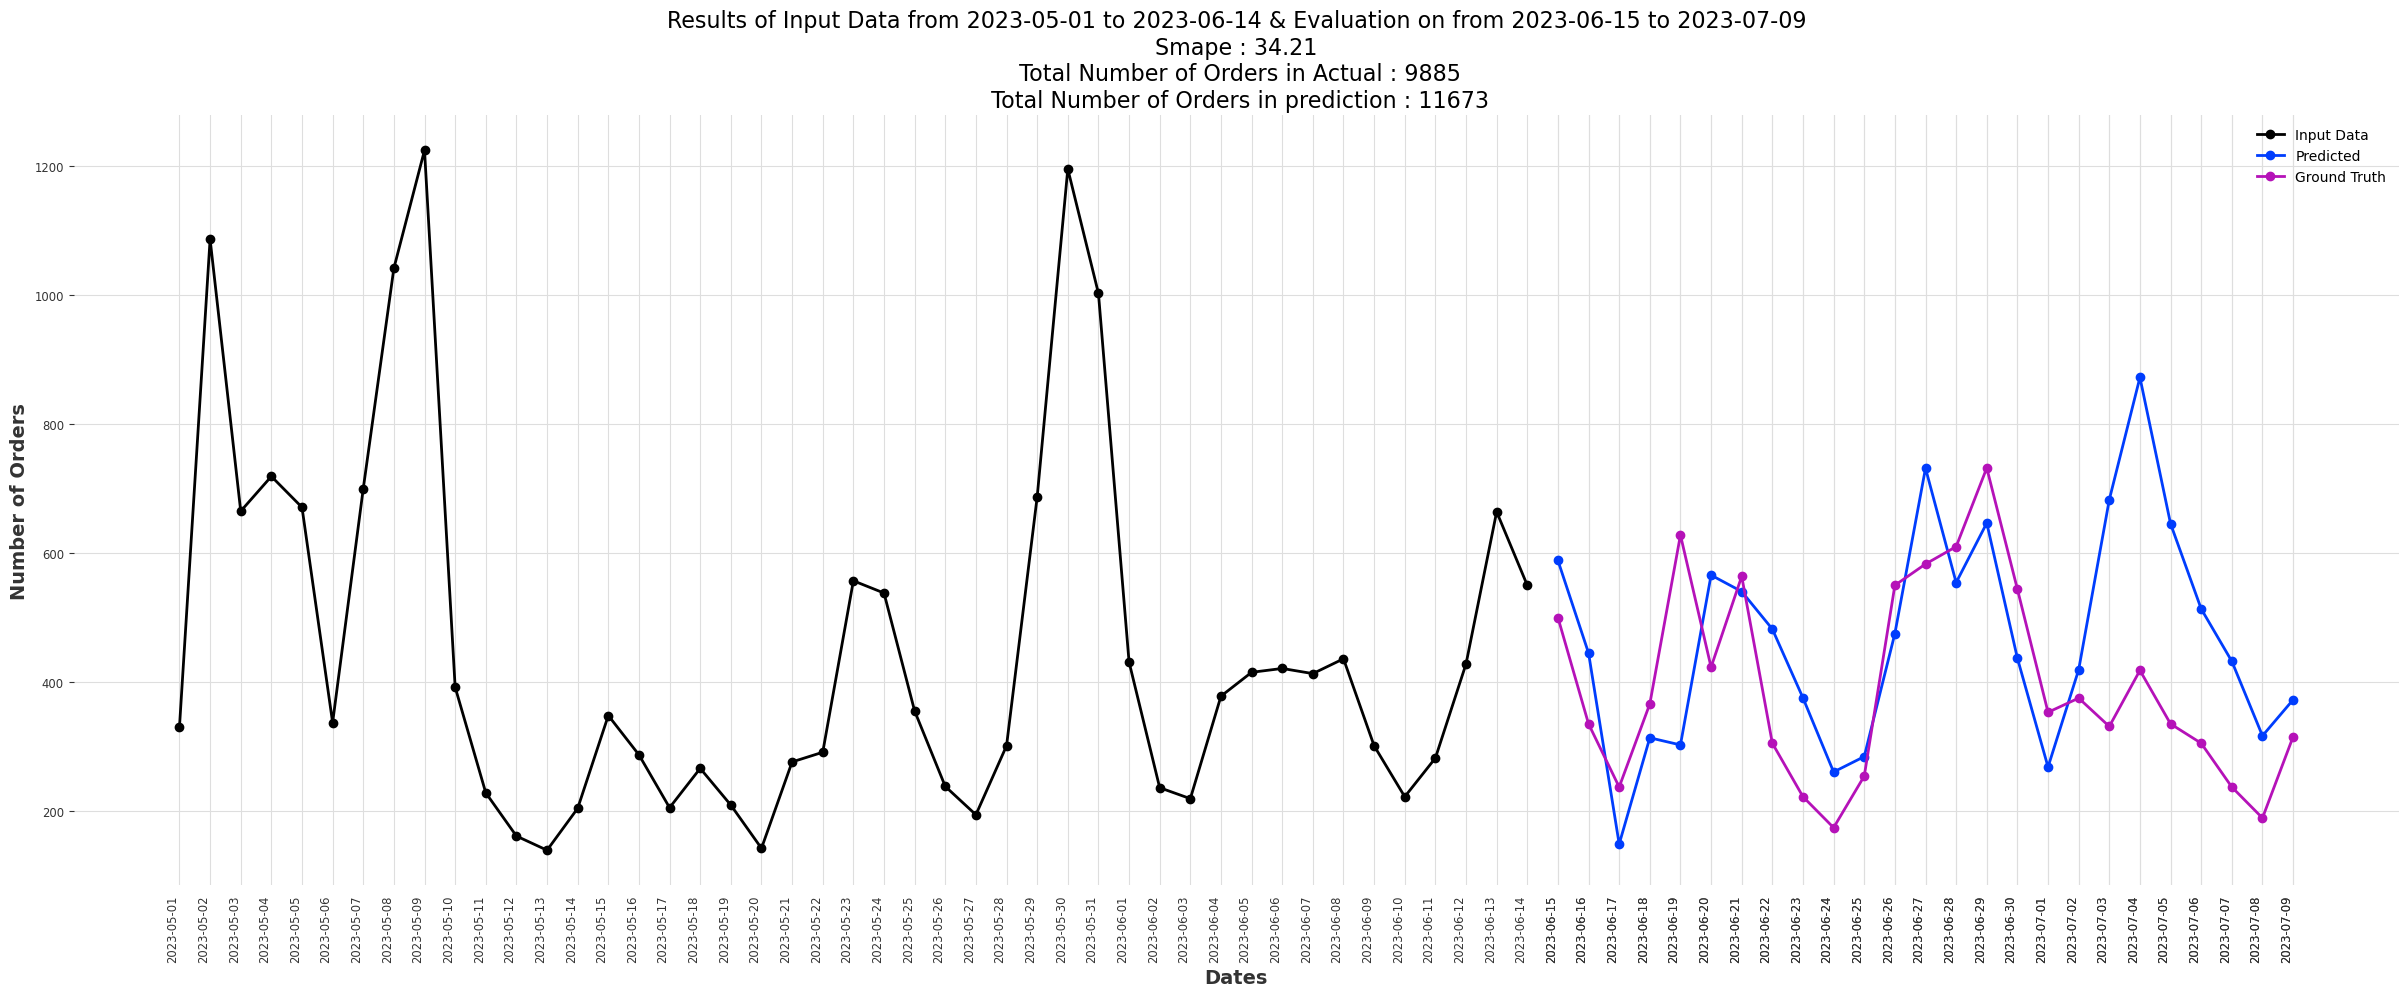

 50%|█████     | 1/2 [00:02<00:02,  2.17s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 75.74it/s]


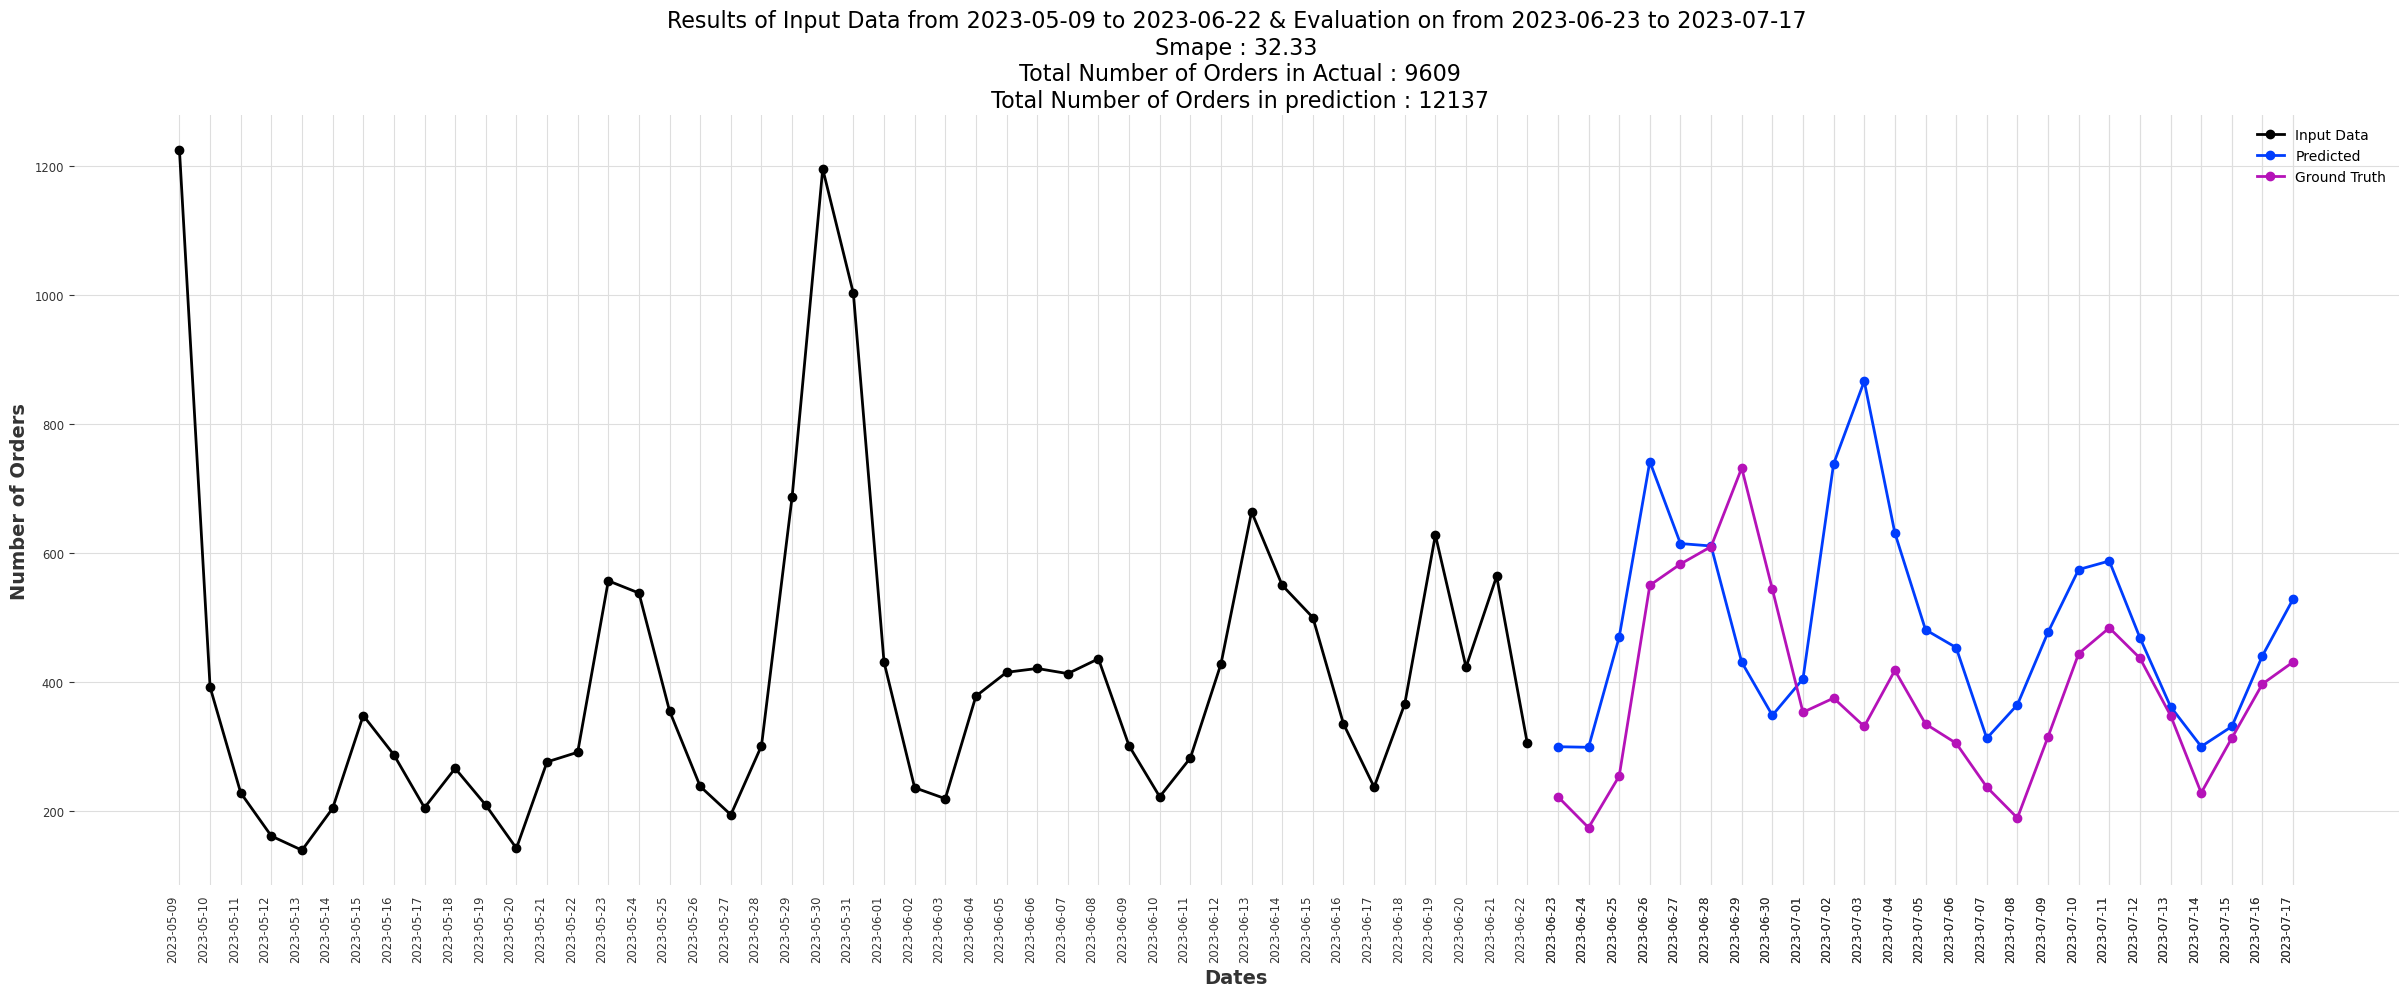

100%|██████████| 2/2 [00:04<00:00,  2.20s/it]


Window_size_45_prediction_horizon_25_slide_step_8 - Evaluation completed.
Iteration : Window size : 45 Horizan: 25, Stride : 15


  0%|          | 0/1 [00:00<?, ?it/s]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 83.89it/s]


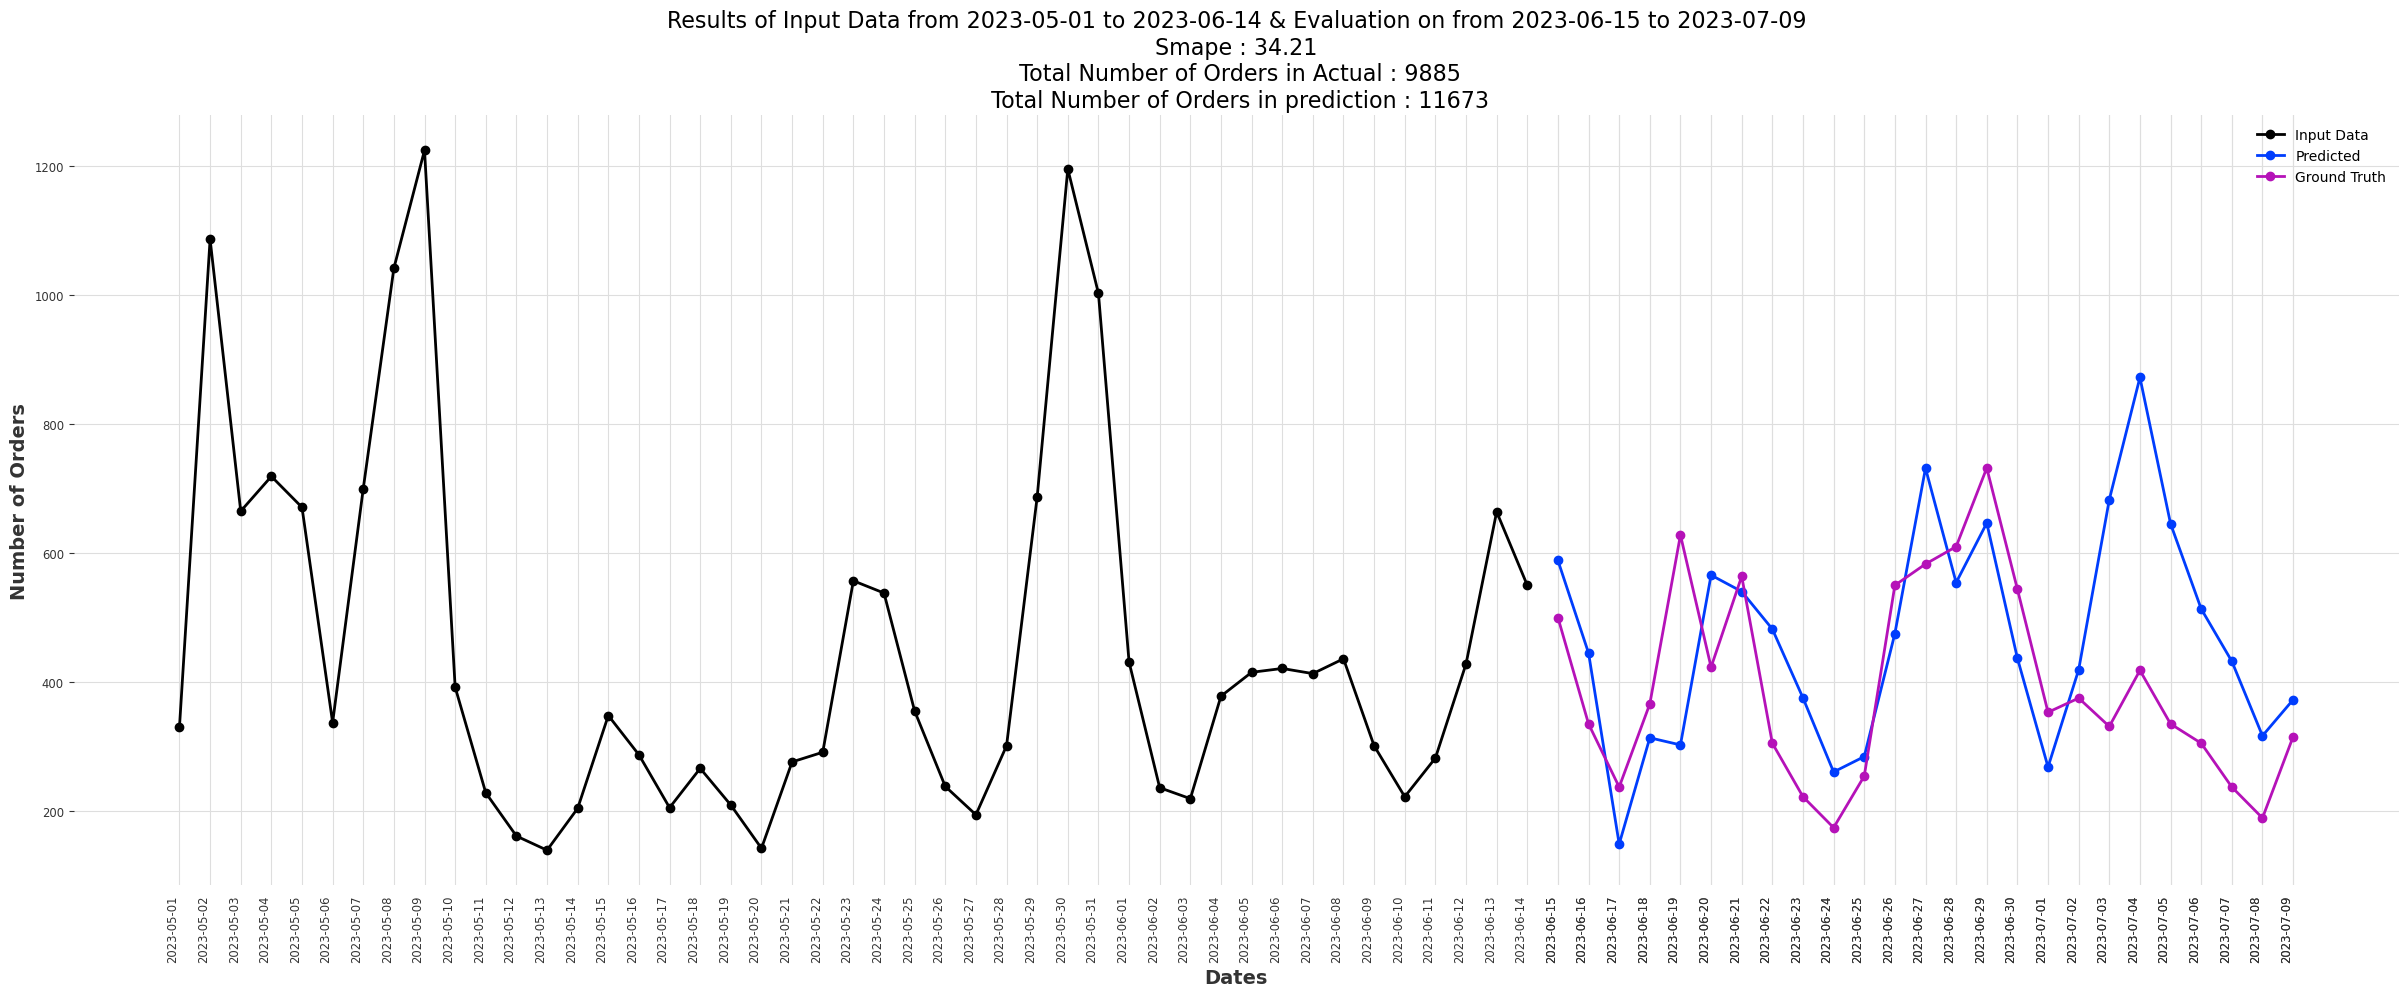

100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Window_size_45_prediction_horizon_25_slide_step_15 - Evaluation completed.
Iteration : Window size : 60 Horizan: 30, Stride : 2


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_30_slide_step_2 - Evaluation completed.
Iteration : Window size : 60 Horizan: 30, Stride : 5


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_30_slide_step_5 - Evaluation completed.
Iteration : Window size : 60 Horizan: 30, Stride : 8


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_30_slide_step_8 - Evaluation completed.
Iteration : Window size : 60 Horizan: 30, Stride : 15


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_30_slide_step_15 - Evaluation completed.
Iteration : Window size : 60 Horizan: 54, Stride : 2


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_54_slide_step_2 - Evaluation completed.
Iteration : Window size : 60 Horizan: 54, Stride : 5


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_54_slide_step_5 - Evaluation completed.
Iteration : Window size : 60 Horizan: 54, Stride : 8


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_54_slide_step_8 - Evaluation completed.
Iteration : Window size : 60 Horizan: 54, Stride : 15


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_54_slide_step_15 - Evaluation completed.
Iteration : Window size : 60 Horizan: 40, Stride : 2


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_40_slide_step_2 - Evaluation completed.
Iteration : Window size : 60 Horizan: 40, Stride : 5


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_40_slide_step_5 - Evaluation completed.
Iteration : Window size : 60 Horizan: 40, Stride : 8


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_40_slide_step_8 - Evaluation completed.
Iteration : Window size : 60 Horizan: 40, Stride : 15


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_40_slide_step_15 - Evaluation completed.
Iteration : Window size : 60 Horizan: 25, Stride : 2


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_25_slide_step_2 - Evaluation completed.
Iteration : Window size : 60 Horizan: 25, Stride : 5


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_25_slide_step_5 - Evaluation completed.
Iteration : Window size : 60 Horizan: 25, Stride : 8


0it [00:00, ?it/s]


Window_size_60_prediction_horizon_25_slide_step_8 - Evaluation completed.
Iteration : Window size : 60 Horizan: 25, Stride : 15


0it [00:00, ?it/s]

Window_size_60_prediction_horizon_25_slide_step_15 - Evaluation completed.


In [58]:
model_name = 'RNN_LSTM'
FileName = 'rnn_lstm_results'
model_object = rnn_model
test_series = test_transformed 
model_evaluation(model_name,model_object,test_series,transformer,FileName)

# Evaluation Metrics

In [ ]:
import pandas as pd
import glob

def aggregate_evaluation_results(file_pattern):
    eval_dict = {
        'window_size': [],
        'horizan': [],
        'stride': [],
        'AVG_MAE': [],
        'AVG_MSE': [],
        'AVG_RMSE': [],
        'AVG_MAPE': [],
        'AVG_SMAPE':[],
        'AVG_R2': [],
        'AVG_MEDEA':[],
        'AVG_MSLE' :[]
    }
    
    paths = glob.glob(file_pattern)
    
    for path in paths:
        window_size = path.split('/')[-1].split('_')[2]
        horizan = path.split('/')[-1].split('_')[4]
        stride = path.split('/')[-1].split('_')[6].split('.')[0]

        df = pd.read_csv(path)
        eval_dict['window_size'].append(window_size)
        eval_dict['horizan'].append(horizan)
        eval_dict['stride'].append(stride)

        eval_dict['AVG_MAE'].append(df['MAE'].mean())
        eval_dict['AVG_MSE'].append(df['MSE'].mean())
        eval_dict['AVG_RMSE'].append(df['RMSE'].mean())
        eval_dict['AVG_MAPE'].append(df['MAPE'].mean())
        
        eval_dict['AVG_SMAPE'].append(df['SMAPE'].mean())
        eval_dict['AVG_R2'].append(df['R2'].mean())
        eval_dict['AVG_MEDEA'].append(df['MEDEA'].mean())
        eval_dict['AVG_MSLE'].append(df['MSLE'].mean())
    
    eval_df = pd.DataFrame.from_dict(eval_dict)
    eval_df = eval_df.dropna()
    eval_df.sort_values(['window_size', 'horizan', 'stride'], inplace=True, ascending=True)
    
    return eval_df

# Example usage
file_pattern = '../ProcessedData/Results/RNN_LSTM/rnn_lstm_results/*.csv'
result_df = aggregate_evaluation_results(file_pattern)
# result_df
for name ,groupDf in result_df.groupby('window_size'):
    display(groupDf)
